# Spam recognition

In this first exercise we will try and study some classifier on a spam recognition task. The data set contains word frequency you may look at the spam.names text file for details about the features. 

In [25]:
import pandas as pd
mails_df=pd.read_csv("spambase.data",header=None)

In [26]:
mails_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [27]:
mails_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Train, test split and preprocessing

As usually, we will split the data into a training and a test dataset. the "train_test_split" function from scikit learn is dedicated to this task. The labels (spam, no spam) are stored in the last column so we first build the X and y matrice and vector.

In [28]:
y=mails_df.iloc[:,57].values
X=mails_df.iloc[:,:57].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

The feature are not all on the same scale so we will first scale them wit centering and reduction.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-nn
We will first build a knn classifier with neighbours and look at its results on the test set: 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [51]:
knn.fit(X_train_scaled,y_train)
yh = knn.predict(X_test_scaled)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,yh)

array([[647,  40],
       [ 76, 388]])

### hyper parameter and cross validation
To use a better value for $k$ we will estimate the genralisation error of our classifier for several values the "GridSearchCV" is designed to accomplish this task herre we will use it to test several value for the "n_neighbors" parameters.

In [34]:
hyper_params = {"n_neighbors":range(1,35,2)}

from sklearn.model_selection import GridSearchCV

In [35]:
grid_res=GridSearchCV(knn,hyper_params)

In [37]:
grid_res.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 35, 2)})

Look at the "grid_res" "cv_results_" filed where the details of the cross-validation results are stored. We will use this to plot the evolution of accuracy estimated by cross validation with respect to the number of neighbors:

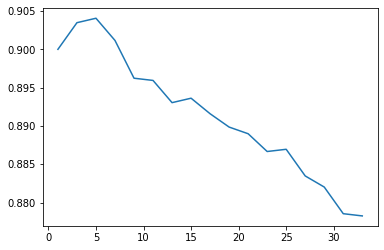

In [38]:
import matplotlib.pyplot as plt

f=plt.plot(grid_res.cv_results_['param_n_neighbors'].filled(0),grid_res.cv_results_["mean_test_score"])

## Weighted loss 

In this task the two type of errors are clearly not equivalent and recognizing a real e-amil as a spam can be clearly problematic. To llok at this point we will define a custom loss function that penalize this type of error   time more than it's opposite:

In [40]:
import numpy as np
def weighted_missclassif(y_true, y_pred):
    missed_spam = np.sum(y_pred[y_true==1]==0)
    wrong_spam  = np.sum(y_pred[y_true==0]==1)
    return missed_spam+3*wrong_spam

We may transform this custom loss to a scorer for compatibility with scikit learn. Scorer assign by convention greater value to better solution so the greater_is_better will neagte our provided function and we may now use this custom function with a gridsearch: 

In [47]:
from sklearn.metrics import make_scorer
score = make_scorer(weighted_missclassif, greater_is_better=False)

In [48]:
grid_res=GridSearchCV(knn,hyper_params,scoring=score)

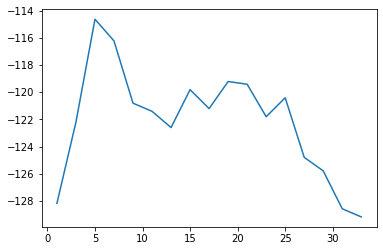

In [49]:
grid_res.fit(X_train_scaled,y_train)
f=plt.plot(grid_res.cv_results_['param_n_neighbors'].filled(0),grid_res.cv_results_["mean_test_score"])

Eventually, we can make prediction for the test set with the best value of k found

In [53]:
yhw=grid_res.predict(X_test_scaled)

In [54]:
confusion_matrix(y_test,yhw)

array([[640,  47],
       [ 58, 406]])

## SVM

We will repeat the same type of process for an svm classifier. however , the hyper parmater are differents we will change the type of kernel the weighting of the two terms in the SVM objective function and the kernel bandwidth for the rbf kernel (it's the same as the gaussian kernel rbf stands for radial basis function)

In [55]:
hyper_params = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3], 'C': [1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

In [60]:
from sklearn.svm import SVC
grid_svm = GridSearchCV(SVC(C=1), hyper_params,  scoring=score)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(C=1),
             param_grid=[{'C': [1, 10], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [1, 10], 'kernel': ['linear']}],
             scoring=make_scorer(weighted_missclassif, greater_is_better=False))

In [61]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [66]:
yhsvm=grid_svm.predict(X_test_scaled)
confusion_matrix(y_test,yhsvm)

array([[644,  43],
       [ 43, 421]])

## Decision tree
Its your turn try now to use a decision tree classifier and define a calue for the max_depth hyper-parameter. You may also use the plot tree function to look at the final fitted tree.

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [62]:
hyper_params = {'max_depth':range(1,30)}

In [63]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), hyper_params,  scoring=score)
grid_dt.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 50)},
             scoring=make_scorer(weighted_missclassif, greater_is_better=False))

In [65]:
grid_dt.best_params_

{'max_depth': 4}

In [67]:
yhdt=grid_dt.predict(X_test_scaled)
confusion_matrix(y_test,yhdt)

array([[659,  28],
       [ 86, 378]])

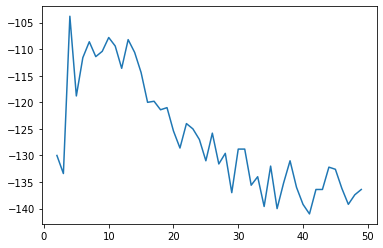

In [70]:
f=plt.plot(grid_dt.cv_results_['param_max_depth'].filled(0),grid_dt.cv_results_["mean_test_score"])

In [74]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=4)

In [75]:
from sklearn.tree import plot_tree

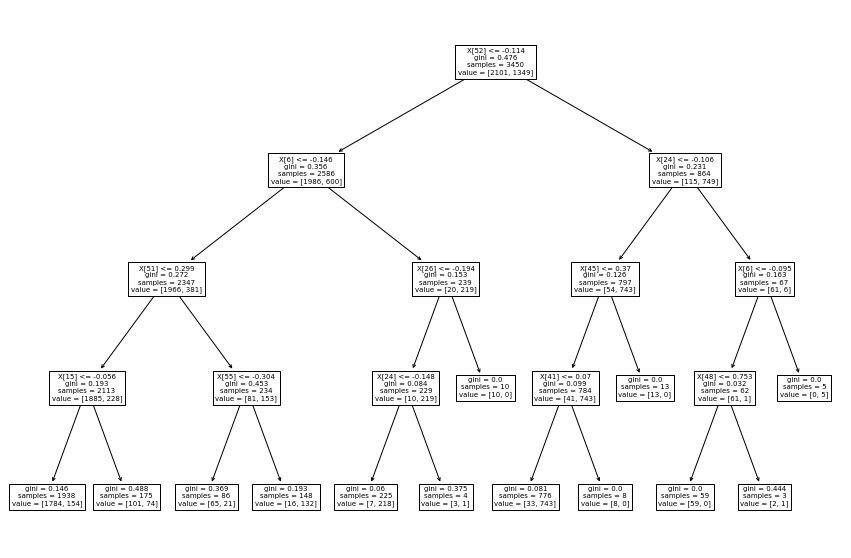

In [80]:
plt.figure(figsize=(15,10))
tp=plot_tree(tree)